# Regularized linear regression

In [4]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

In [5]:
#Load data
url = "https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/dataset.csv"
df_raw = pd.read_csv(url)

In [7]:
#Get basic info
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [8]:
pd.options.display.max_columns=100
pd.options.display.max_rows=20
#Set options to see info properly

In [9]:
df_raw.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 108 columns):
 #    Column                                                                         Non-Null Count  Dtype  
---   ------                                                                         --------------  -----  
 0    fips                                                                           3140 non-null   int64  
 1    TOT_POP                                                                        3140 non-null   int64  
 2    0-9                                                                            3140 non-null   int64  
 3    0-9 y/o % of total pop                                                         3140 non-null   float64
 4    19-Oct                                                                         3140 non-null   int64  
 5    10-19 y/o % of total pop                                                       3140 non-null   float64
 6    20-29         

In [10]:
df_raw.sample(10)

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,...,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
974,20177,177499,22795,12.842326,23476,13.225990,21740,12.247956,22165,12.487394,19895,11.208514,23007,12.961763,22760,12.822607,13438,7.570747,8223,4.632702,149461,84.203855,15078,8.494696,2511,1.414656,2789,1.571276,221,0.124508,7439,4.191010,177499,-674,4392,11.9,10.2,1.7,0.6,-6.1,-5.5,9572,37674,36044,37093,8.0,31.3,29.9,30.8,24062,...,3184,3.5,53612,92.2,227.6,206.5,88.0,80.5,6.8,6.3,100.104021,50.722622,8.474092,73.462452,109.065831,232.458363,52,178392,41511,23.3,Shawnee,Kansas,20,177,135549,47.7,45.8,49.6,64671,38.6,37.2,39.9,52322,7.0,6.3,7.6,9435,7.6,6.4,8.8,10254,12.4,11.5,13.4,16865,3.1,2.9,3.3,4188,4
705,18021,26170,3241,12.384410,3311,12.651891,3039,11.612533,3144,12.013756,3263,12.468475,3617,13.821169,3448,13.175392,1947,7.439817,1160,4.432556,25467,97.313718,189,0.722201,75,0.286588,96,0.366832,12,0.045854,331,1.264807,26170,15,341,11.4,10.9,0.5,0.0,0.2,0.2,1520,8082,5530,3061,8.4,44.4,30.4,16.8,3545,...,482,3.9,52699,94.6,230.8,212.0,80.3,74.4,6.5,6.1,13.503685,3.304551,0.516214,10.289080,12.995292,34.046649,0,26375,6400,24.3,Clay,Indiana,18,21,20146,49.4,47.0,51.7,9962,35.8,33.8,37.6,7212,8.3,7.5,9.1,1675,10.4,9.0,11.9,2088,13.3,12.3,14.4,2686,3.2,3.0,3.4,643,4
512,13259,6199,432,6.968866,456,7.356025,1502,24.229714,1152,18.583643,654,10.550089,704,11.356670,640,10.324246,398,6.420390,261,4.210357,2782,44.878206,3021,48.733667,67,1.080819,191,3.081142,1,0.016132,137,2.210034,6199,20,1552,6.8,10.3,-3.6,24.6,-17.8,6.8,1292,1923,827,512,28.4,42.2,18.2,11.2,1757,...,110,4.7,33053,56.4,22

In [11]:
df_raw.describe()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,...,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
count,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,...,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.00000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,30401.640764,1.041894e+05,1.274030e+04,11.871051,1.336798e+04,12.694609,1.446933e+04,12.283979,1.391649e+04,11.751535,1.288521e+04,11.556685,1.363803e+04,13.526733,1.191621e+04,13.182225,7220.310510,8.399382,4035.541720,4.733801,7.965979e+04,84.494109,1.395026e+04,9.34240

In [12]:
#Copy df into a new one in order to make transformations
df = df_raw.copy()

In [13]:
#Transforming categorical variables
df.STATE_FIPS = pd.Categorical(df.STATE_FIPS)
df.CNTY_FIPS = pd.Categorical(df.CNTY_FIPS)
df.Urban_rural_code = pd.Categorical(df.Urban_rural_code)

In [14]:
#Splitting data to avoid bias
#Dropping health resources related cols (they could be used as target variables)
X= df.drop(['CNTY_FIPS','fips','Active Physicians per 100000 Population 2018 (AAMC)','Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)', 'Active Primary Care Physicians per 100000 Population 2018 (AAMC)', 'Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)','Active General Surgeons per 100000 Population 2018 (AAMC)','Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)','Total nurse practitioners (2019)','Total physician assistants (2019)','Total physician assistants (2019)','Total Hospitals (2019)','Internal Medicine Primary Care (2019)','Family Medicine/General Practice Primary Care (2019)','STATE_NAME','COUNTY_NAME','ICU Beds_x','Total Specialist Physicians (2019)'], axis=1)
y = df['ICU Beds_x']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=25)

In [15]:
#Join train data
df_train = pd.concat((X_train, y_train), axis=1)

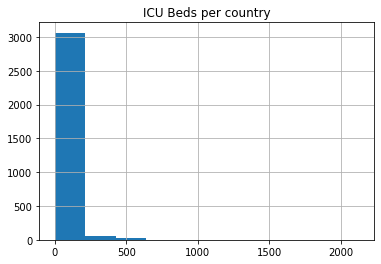

In [16]:
#Target variable histogram
y.hist()
plt.title('ICU Beds per country')
plt.show()
#Right skewed distribution

In [17]:
#Target descriptive stats
y.describe()

count    3140.000000
mean       23.817516
std        84.602028
min         0.000000
25%         0.000000
50%         0.000000
75%        12.000000
max      2126.000000
Name: ICU Beds_x, dtype: float64

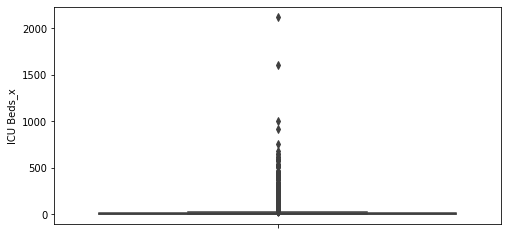

In [31]:
#Boxplot
plt.figure(figsize = (8, 4))
sns.boxplot(y = y)
plt.show()

In [18]:
df[df['ICU Beds_x'] > 2000]
#Trying to determine if 2126 is a normal number of ICU beds even though its high

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,...,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
202,6037,10105518,1208253,11.956369,1239139,12.262004,1557073,15.408146,1501844,14.861623,1350076,13.35979,1306003,12.923662,1014325,10.037338,572530,5.665519,356275,3.525549,7151444,70.767713,906467,8.97002,145254,1.437373,1551894,15.356897,37200,0.368116,313259,3.099881,10105518,-13241,178334,11.8,6.8,5.0,3.5,-9.8,-6.3,1460718,1416482,1790808,2177481,21.3,20.7,26.2,31.8,1409155,...,239829,4.7,67986,90.3,279.6,243.8,96.2,87.1,7.2,6.2,3937.767709,2022.531916,91.712638,5713.007608,3882.586846,15014.04866,2126,10105722,1800341,17.8,Los Angeles,California,6,37,7916625,36.3,35.0,37.7,2877316,26.5,25.6,27.3,2097906,5.5,5.1,5.9,434790,5.5,4.8,6.1,434075,12.0,11.4,12.7,952335,3.0,2.9,3.2,237766,1


In [19]:
df_corr = df.corr()
df_corr
#Trying to see correlations since there are too many variables to plot a correlation matrix

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,...,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number
fips,1.000000,-0.056079,-0.049580,-0.010586,-0.053130,0.018994,-0.053591,-0.030310,-0.051715,-0.045491,-0.054239,-0.051777,-0.057730,-0.007890,-0.060851,0.036143,-0.070460,0.040678,-0.069895,0.039802,-0.052099,0.137095,-0.041127,-0.130194,-0.064405,-0.001718,-0.061055,-0.076854,-0.055792,-0.048134,-0.069552,-0.049813,-0.056079,-0.020355,-0.056912,-0.034638,-0.017157,-0.010067,0.043293,0.036635,0.045086,-0.056196,-0.052330,-0.063897,-0.052762,-0.004694,0.003130,-0.054556,0.030866,-0.053726,...,0.042657,0.039818,0.045038,-0.054097,-0.053902,-0.057558,-0.105372,0.042657,0.011284,0.075255,0.061215,0.012989,-0.014039,0.126417,0.104767,-0.059903,-0.038218,-0.030419,-0.055315,-0.047988,-0.050077,-0.052409,-0.056233,-0.065207,0.047686,-0.057449,0.028766,0.024075,0.033331,-0.052585,0.084044,0.079244,0.088737,-0.046061,0.007443,0.001159,0.012330,-0.060668,-0.075188,-0.082630,-0.069494,-0.063463,-0.031057,-0.036327,-0.026483,-0.056055,-0.040631,-0.044576,-0.033649,-0.062322
TOT_POP,-0.056079,1.000000,0.994010,0.052507,0.994596,0.023384,0.994558,0.160254,0.995526,0.295635,0.998031,0.184424,0.997000,-0.092164,0.993624,-0.215300,0.980942,-0.207271,0.970889,-0.175148,0.988500,-0.153597,0.798709,0.087330,0.748573,-0.043600,0.840339,0.476078,0.478293,0.033349,0.898469,0.123643,1.000000,0.446357,0.889263,0.081277,-0.202414,0.184506,0.272763,0.001055,0.052902,0.947348,0.980574,0.991155,0.967693,-0.050199,-0.315515,-0.099708,0.329345,0.965635,...,0.277091,0.318247,0.235980,0.998042,0.997751,0.984959

In [20]:
df_corr = pd.DataFrame(df_train.corrwith(df['ICU Beds_x'], axis = 0), columns = ['Correlation'])
df_corr[abs(df_corr['Correlation']) > 0.5]
#Trying to see correlations higher than 0.5 since there are too many variables to plot a correlation matrix
#It seems that countries with more population have more beds (which makes sense)

,Correlation
TOT_POP,0.911239
0-9,0.905747
19-Oct,0.904717
20-29,0.911915
30-39,0.907104
...,...
Heart disease_number,0.918070
COPD_number,0.925305
diabetes_number,0.908322
CKD_number,0.915482


In [21]:
#LASSO | Default alpha 10%
pipeline = make_pipeline(StandardScaler(), Lasso(alpha=10)) #Pipeline to normalize data and then apply Lasso
pipeline.fit(X_train, y_train)
print(pipeline[1].coef_, pipeline[1].intercept_)

[ 0.          0.          0.          0.         -0.          0.
  0.          0.          0.          0.         -0.          0.
 -0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.          4.75394371  0.          0.
 -0.          0.          0.          0.         -0.          0.
  0.          0.          0.          6.55584913  0.         -0.
  0.          0.         -0.         -0.          0.          0.
  0.          0.         -0.         -0.         -0.          0.
  0.          0.          0.          0.         -0.         -0.
 -0.          0.          0.          0.         -0.         -0.
 -0.          0.          0.         -0.         -0.          0.
 -0.         -0.         -0.          0.         -0.         -0.
 -0.         28.22330889 -0.         -0.         -0.          0.
 -0.         -0.         -0.         31.3777115  -0.         -0.
 -0.          0.         -0.         -0.         -0.          0.
 -0.        ] 23.26454352

In [22]:
coef_list=pipeline[1].coef_

In [23]:
loc=[i for i, e in enumerate(coef_list) if e != 0]
loc

[21, 33, 73, 81]

In [24]:
col_name=df.columns
col_name[loc]

Index(['% White-alone', 'N_POP_CHG_2018', 'Total Specialist Physicians (2019)',
       'CNTY_FIPS'],
      dtype='object')

In [25]:
print("Score with alpha 10% in train dataset:", round(pipeline.score(X_train, y_train), 4))
print("Score with alpha 10% in test dataset:", round(pipeline.score(X_test, y_test), 4))  

Score with alpha 10% in train dataset: 0.8526
Score with alpha 10% in test dataset: 0.8397


In [26]:
# Variable selection
list_final=[]
list_final.extend(loc)

In [27]:
print(list_final)

[21, 33, 73, 81]


In [28]:
my_IV=list(set(list_final))
col_name[my_IV]

Index(['Total Specialist Physicians (2019)', 'N_POP_CHG_2018', '% White-alone',
       'CNTY_FIPS'],
      dtype='object')